In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [15]:
items = pd.read_csv('items.csv')
categories = pd.read_csv('item_categories.csv')
shops = pd.read_csv('shops.csv')
train = pd.read_csv('sales_train.csv')
test = pd.read_csv('test.csv')

In [16]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [17]:
categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [12]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [13]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [11]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [12]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
date_block_num,2935849.0,14.569911,9.422988,0.0,7.0,14.0,23.0,33.0
shop_id,2935849.0,33.001728,16.226973,0.0,22.0,31.0,47.0,59.0
item_id,2935849.0,10197.227057,6324.297354,0.0,4476.0,9343.0,15684.0,22169.0
item_price,2935849.0,890.853233,1729.799631,-1.0,249.0,399.0,999.0,307980.0
item_cnt_day,2935849.0,1.242641,2.618834,-22.0,1.0,1.0,1.0,2169.0


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [14]:
train.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [15]:
train['date'] = pd.to_datetime(train['date'])
train['date'] = train['date'].apply(lambda x: x.strftime("%Y-%m"))
train.head().sort_values(by = 'date')

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
4,2013-01,0,25,2555,1099.00,1.0
0,2013-02,0,59,22154,999.00,1.0
1,2013-03,0,25,2552,899.00,1.0
2,2013-05,0,25,2552,899.00,-1.0
3,2013-06,0,25,2554,1709.05,1.0


<AxesSubplot:title={'center':'Pearson Correlation'}>

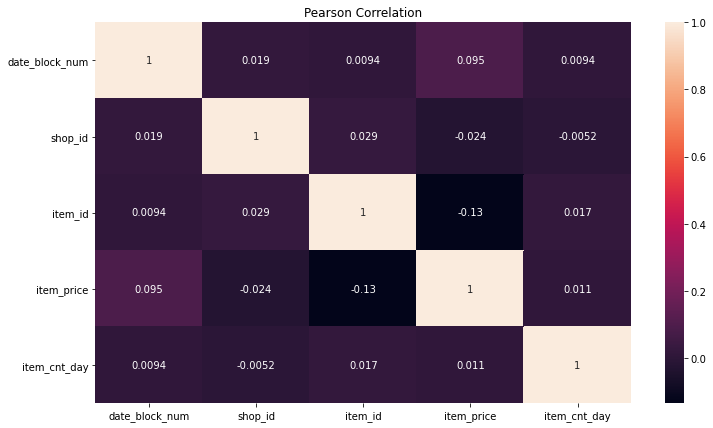

In [16]:
plt.figure(figsize = (12,7))
plt.title("Pearson Correlation")
sns.heatmap(train.corr(),annot=True)

<AxesSubplot:xlabel='item_price'>

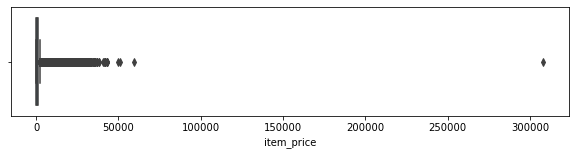

In [17]:
plt.figure(figsize = (10,2))
sns.boxplot(x = train['item_price'])

In [18]:
train.drop(['date_block_num','item_price'],axis = 1,inplace = True)

In [19]:
df = train.groupby(['date','shop_id','item_id']).sum()
df

item_cnt_day
date    shop_id item_id              
2013-01 0       32                4.0
                33                2.0
                35                2.0
                43                1.0
                51                2.0
...                               ...
2015-12 59      21421             1.0
                21669             1.0
                21872             1.0
                21968            -1.0
                22088             2.0

[1799395 rows x 1 columns]

In [20]:
df = train.pivot_table(index=['shop_id','item_id'], columns='date', values='item_cnt_day', fill_value=0)
df.reset_index(inplace=True)
df.head()

date,shop_id,item_id,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,...,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12
0,0,30,0.000000,3.444444,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,31,0.000000,1.571429,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,32,1.333333,1.500000,2.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,33,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,35,1.000000,1.200000,0.0,1.0,0.0,2.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
test_df = pd.merge(test, df, on=['shop_id','item_id'], how='left')
test_df.drop(['ID', '2013-01'], axis=1, inplace=True)
test_df = test_df.fillna(0)
test_df.head()

,shop_id,item_id,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,...,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12
0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.5,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
y = df['2015-10'].values
x = df.drop(['2015-10'], axis = 1)
test_full = test_df
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [23]:
lr = LinearRegression()
lr.fit(x_train, y_train)
predict = lr.predict(x_test)
print('Test set mse:', mean_squared_error(y_test, predict))
score = lr.score(x_train,y_train)
print('Train set score:', score)

Test set mse: 0.11770213590877557
Train set score: 0.7742918394723572


In [24]:
rndm_forst = RandomForestRegressor(n_estimators = 50)
rndm_forst.fit(x_train, y_train)
print('Train set mse:', mean_squared_error(y_train, rndm_forst.predict(x_train)))
print('Test set mse:', mean_squared_error(y_test, rndm_forst.predict(x_test)))
print('Train set score:', rndm_forst.score(x_train,y_train))

Train set mse: 0.14183678647671188
Test set mse: 0.08227759265058524
Train set score: 0.8643106991499288
